In [1]:
# project: p2
# submitter: walmousa
# partner: none
# hours: 12

In [2]:
import loans
from zipfile import ZipFile, ZIP_DEFLATED
from io import TextIOWrapper
import json
import csv
import zipfile
import io
import search
import time
import matplotlib
import pandas as pd
%load_ext autoreload
%autoreload 2

In [3]:
# for amt in loan.yearly_amounts(20000):
#     print(amt)

# python3 tester.py p2.ipynb

In [4]:
#Q1: 

bank1 = loans.Bank("First Home Bank")
total=0
count=0
for loan in bank1:
    if loan.interest_rate != -1:
        count+=1
        total+= loan.interest_rate
        

        

average_interest = total/count
average_interest


2.962962962962963

In [5]:
#Q2: 
total_app=0
count_loans=0
for loan in bank1:
    count_loans+=1
    total_app += len(loan.applicants)
        
average_app = total_app/count_loans

average_app


1.5777777777777777

In [6]:
#Q3: 

age_dict={}

for loan in bank1:
    for applicant in loan.applicants:
        if applicant.age in age_dict:
            age_dict[applicant.age]+=1
        else: 
            age_dict[applicant.age]=1

age_dict

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [7]:
#Q4: 
loantree = search.BST()
for loan in bank1:
    loantree.add(loan.interest_rate, loan)
    
len(loantree[-1])

18

In [8]:

def height(self):
    if self.left == None:
        l = 0
    else:
        # recurse left
        l = height(self.left)
            
    if self.right == None:
        r = 0
    else:
        # recurse right
        r = height(self.right)   
    return max(l, r)+1

In [9]:
# This function was written before we were given the height function in lecture
# def get_height(root):
#     if root==None:
#         return 0
    
#     return 1 + max(get_height(root.left), get_height(root.right))
    


In [10]:
#Q5:
# 
# get_height(loantree.root)
height(loantree.root)

9

In [11]:
uwcu = loans.Bank("University of Wisconsin Credit Union")


Text(0.5, 0, 'BST Adds')

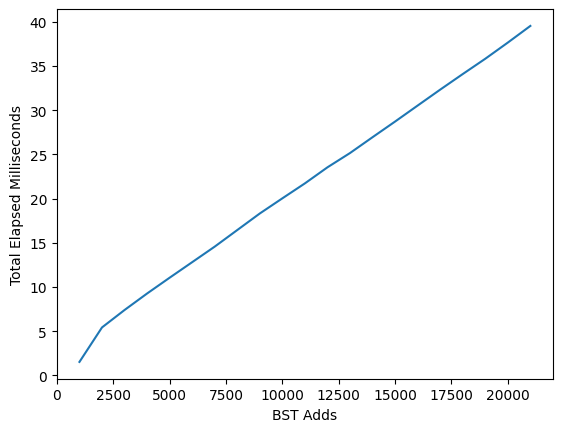

In [12]:
#Q6:

loantree2 = search.BST()
times_df = pd.DataFrame(dtype=float)
count=0
t0=time.time()
for loan in uwcu:
    count+=1
    loantree2.add(loan.interest_rate, loan)
    if count%1000==0:
        times_df.at[count, ""]= (time.time()-t0)*1e3


ax=times_df.plot.line()
ax.get_legend().remove()
ax.set_ylabel('Total Elapsed Milliseconds')
ax.set_xlabel('BST Adds')

Text(0, 0.5, 'Milliseconds')

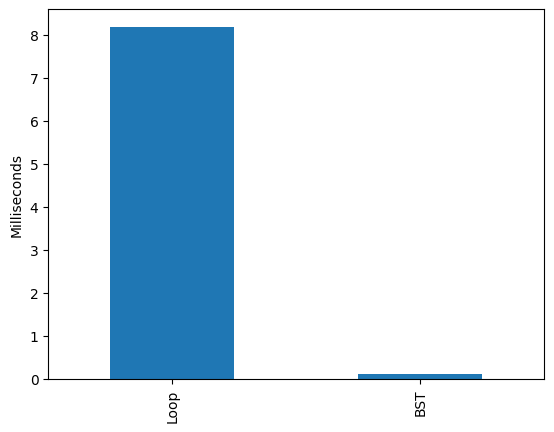

In [13]:
#Q7:

df_7={}

count=0
loop_s=time.time()
for loan in uwcu:
    if loan.interest_rate == -1:
        count+=1

loop_e=time.time()

loop_time=(loop_e-loop_s)*1e3
df_7["Loop"]=loop_time

t0=time.time()
len(loantree2[-1])
t1=time.time()
len_t=(t1-t0)*1e3
df_7["BST"]=len_t

ax=pd.Series(df_7).plot.bar()
ax.set_ylabel('Milliseconds')


Text(0, 0.5, 'Number of Applicants')

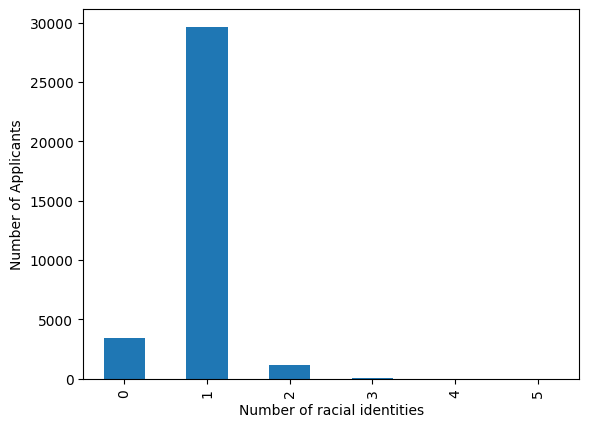

In [14]:
#Q8:
race_dict={}
num_races=[]
for loan in uwcu:
    for applicant in loan.applicants:
        if len(applicant.race) not in num_races:
            num_races.append(len(applicant.race))
            race_dict[len(applicant.race)]=1
        else:
            race_dict[len(applicant.race)]+=1

num_races.sort()
race_dict={i: race_dict[i] for i in num_races}


ax=pd.Series(race_dict).plot.bar()
ax.set_xlabel("Number of racial identities")
ax.set_ylabel("Number of Applicants")

In [15]:
#Q9:

def num_leafs(root):
    if root==None:
        return 0
    if root.left==None and root.right==None:
        return 1
    else: 
        return num_leafs(root.left) + num_leafs(root.right)
    
num_leafs(loantree2.root)

9

In [16]:
#Q10: 

def max_vals(root):
    rates_list = []
    max_finder(root, rates_list)
    rates_list.sort(reverse=True)
    return rates_list

def max_finder(root, rates_list):
    if root == None:
        return    
    if len(rates_list)<5:
        rates_list.append(root.key)
    elif root.key not in rates_list and min(rates_list)<root.key:
        i=rates_list.index(min(rates_list))
        rates_list[i]=root.key
    max_finder(root.right, rates_list)
    max_finder(root.left, rates_list)
    return

# the above functions are inspired by code found on the linked website. i am not trying to cheat/plagerize. https://favtutor.com/blogs/tree-traversal-python-with-recursion

rate_list = max_vals(loantree2.root)
rate_list[2]

5.99